##### Create some fake data to do some experiments on the runtime complexity of your decision tree algorithm. Create a dataset with N samples and M binary features. Vary M and N to plot the time taken for: 1) learning the tree, 2) predicting for test data. How do these results compare with theoretical time complexity for decision tree creation and prediction. You should do the comparison for all the four cases of decision trees.

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)

Function to create fake data (all types)

In [12]:
def make_data(N,M,data_type):
    if data_type == 'DIDO':
        X = pd.DataFrame(np.random.randint(0,2,size=(N,M)),columns=[f'feature_{i}' for i in range(M)])
        y = pd.Series(np.random.randint(0,2,size=N),dtype='category')
    elif data_type == 'DIRO':
        X = pd.DataFrame(np.random.randint(0,2,size=(N,M)),columns=[f'feature_{i}' for i in range(M)])
        y = pd.Series(np.random.randn(N))
    
    elif data_type == 'RIDO':
        X = pd.DataFrame(np.random.randn(N,M),columns=[f'feature_{i}' for i in range(M)])
        y = pd.Series(np.random.randint(0,2,size=N),dtype='category')

    else:
        X = pd.DataFrame(np.random.randn(N,M),columns=[f'feature_{i}' for i in range(M)])
        y = pd.Series(np.random.randn(N))

    return X,y


Function to split the data into train test

In [3]:
def data_split(X,y,test_size=0.2):
    idx = int(np.ceil(0.8*len(y)))
    X_train , X_test = X[:idx+1] , X[idx+1:]
    y_train , y_test = y[:idx+1] , y[idx+1:]

    return X_train,X_test,y_train,y_test

Calculate the average time to calculate the average time of fit function on a particular N x M input dataset

In [14]:
def calculate_avg_time(tree,X_train,X_test,y_train,num_average_time):

    fit_time = []
    predict_time = []

    for _ in range(num_average_time):
        st = time.time()
        tree.fit(X_train,y_train)
        fit_time.append(time.time()-st)

        st = time.time()
        _=tree.predict(X_test)
        predict_time.append(time.time()-st)

    fit_time_mean = pd.Series(fit_time).mean()
    predict_time_mean = pd.Series(predict_time).mean()

    fit_time_std = pd.Series(fit_time).std()
    predict_time_std = pd.Series(predict_time).std()

    return fit_time_mean,predict_time_mean,fit_time_std,predict_time_std


Function to run the calculate_avg_time function for each value in NxM.

In [20]:
def experiment(values_N,values_M,num_average_time = 10,data_type = 'DIDO'):
    fit_time     = []
    predict_time = []
    fit_time_std = []
    predict_time_std = []
    
    for N in values_N:
        for M in values_M:
            print(f'Under progress: N={N}, M={M}')
            X,y = make_data(N,M,data_type)
            x_train,x_test,y_train,_ = data_split(X,y)
            
            if data_type == 'DIDO' or data_type == 'RIDO':
                tree = DecisionTree(criterion='gini_index',max_depth=8)
            
            else:
                tree = DecisionTree(criterion='mse',max_depth=5)
            
            f_time , p_time ,f_std , p_std= calculate_avg_time(tree,x_train,x_test,y_train,num_average_time)
            fit_time.append(f_time)
            predict_time.append(p_time)
            fit_time_std.append(f_std)
            predict_time_std.append(p_std)
        
    return fit_time,predict_time,fit_time_std,predict_time_std


In [61]:
values_N = [10,100,1000,10000]
values_M = [2,4,8,16,32,64,128,256]

#### CASE1: Discrete Input Discrete Output (DIDO)

In [62]:
fit_time,predict_time,fit_time_std,predict_time_std = experiment(values_N,values_M,num_average_time=10,data_type='DIDO')

Under progress: N=10, M=2
Under progress: N=10, M=4
Under progress: N=10, M=8
Under progress: N=10, M=16
Under progress: N=10, M=32
Under progress: N=10, M=64
Under progress: N=10, M=128
Under progress: N=10, M=256
Under progress: N=100, M=2
Under progress: N=100, M=4
Under progress: N=100, M=8
Under progress: N=100, M=16
Under progress: N=100, M=32
Under progress: N=100, M=64
Under progress: N=100, M=128
Under progress: N=100, M=256
Under progress: N=1000, M=2
Under progress: N=1000, M=4
Under progress: N=1000, M=8
Under progress: N=1000, M=16
Under progress: N=1000, M=32
Under progress: N=1000, M=64
Under progress: N=1000, M=128
Under progress: N=1000, M=256
Under progress: N=10000, M=2
Under progress: N=10000, M=4
Under progress: N=10000, M=8
Under progress: N=10000, M=16
Under progress: N=10000, M=32
Under progress: N=10000, M=64
Under progress: N=10000, M=128
Under progress: N=10000, M=256


In [63]:
with open('Fit_time_results.txt','w') as file:
    for item in fit_time:
        file.write(f'{item}\n')

In [65]:
with open('Fit_time_results.txt','r') as file:
    lst = [item.strip() for item in file]

In [56]:
print(f'N_grid:')
print(N_grid)
print()
print(f'M_grid:')
print(M_grid)

N_grid:
[[  2   4   8  16  32  64 128 256]
 [  2   4   8  16  32  64 128 256]
 [  2   4   8  16  32  64 128 256]
 [  2   4   8  16  32  64 128 256]
 [  2   4   8  16  32  64 128 256]]

M_grid:
[[    10     10     10     10     10     10     10     10]
 [   100    100    100    100    100    100    100    100]
 [  1000   1000   1000   1000   1000   1000   1000   1000]
 [ 10000  10000  10000  10000  10000  10000  10000  10000]
 [100000 100000 100000 100000 100000 100000 100000 100000]]


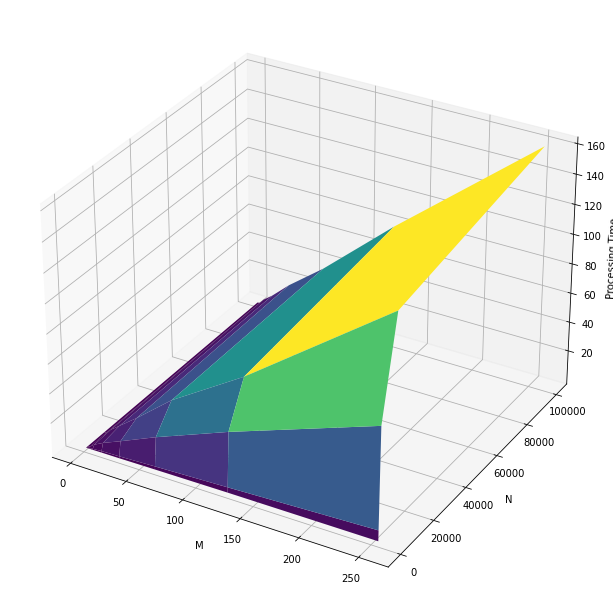

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

times = fit_time

fit_time_grid = np.array(fit_time).reshape(len(values_N), len(values_M))

N_grid, M_grid = np.meshgrid(values_M, values_N)  

fig = plt.figure(figsize=(11,11))
fig = fig.add_subplot(111, projection='3d')

fig.plot_surface(N_grid, M_grid, fit_time_grid, cmap='viridis')

fig.set_xlabel('M')
fig.set_ylabel('N')
fig.set_zlabel('Processing Time')

plt.show()


#### CASE2: Real Input Discrete Output (RIDO)

In [68]:
fit_time,predict_time,fit_time_std,predict_time_std = experiment(values_N,values_M,num_average_time=10,data_type='RIDO')

Under progress: N=10, M=2
Under progress: N=10, M=4
Under progress: N=10, M=8
Under progress: N=10, M=16
Under progress: N=10, M=32
Under progress: N=10, M=64
Under progress: N=10, M=128
Under progress: N=10, M=256
Under progress: N=100, M=2
Under progress: N=100, M=4
Under progress: N=100, M=8
Under progress: N=100, M=16
Under progress: N=100, M=32
Under progress: N=100, M=64
Under progress: N=100, M=128
Under progress: N=100, M=256
Under progress: N=1000, M=2
Under progress: N=1000, M=4
Under progress: N=1000, M=8
Under progress: N=1000, M=16


KeyboardInterrupt: 